In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anomaly-dataset/financial_anomaly_data.csv


          Timestamp TransactionID AccountID    Amount   Merchant  \
0  01-01-2023 08:00       TXN1127      ACC4  95071.92  MerchantH   
1  01-01-2023 08:01       TXN1639     ACC10  15607.89  MerchantH   
2  01-01-2023 08:02        TXN872      ACC8  65092.34  MerchantE   
3  01-01-2023 08:03       TXN1438      ACC6     87.87  MerchantE   
4  01-01-2023 08:04       TXN1338      ACC6    716.56  MerchantI   

  TransactionType     Location  
0        Purchase        Tokyo  
1        Purchase       London  
2      Withdrawal       London  
3        Purchase       London  
4        Purchase  Los Angeles  
(217441, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217441 entries, 0 to 217440
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Timestamp        216960 non-null  object 
 1   TransactionID    216960 non-null  object 
 2   AccountID        216960 non-null  object 
 3   Amount           216960 non-nul

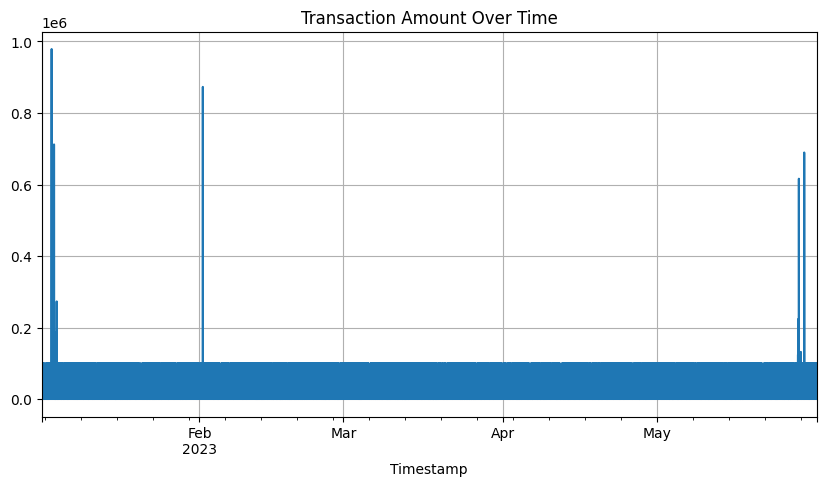

Unique Transaction IDs: 1999
Unique Account IDs: 15
The total transactions for account ACC1 is 14365
The total transactions for account ACC10 is 14362
The total transactions for account ACC11 is 14446
The total transactions for account ACC12 is 14421
The total transactions for account ACC13 is 14421
The total transactions for account ACC14 is 14458
The total transactions for account ACC15 is 14701
The total transactions for account ACC2 is 14553
The total transactions for account ACC3 is 14285
The total transactions for account ACC4 is 14456
The total transactions for account ACC5 is 14630
The total transactions for account ACC6 is 14352
The total transactions for account ACC7 is 14581
The total transactions for account ACC8 is 14402
The total transactions for account ACC9 is 14527
The average transaction amount for account ACC1 is 50428.5296484511
The average transaction amount for account ACC10 is 49729.92767581117
The average transaction amount for account ACC11 is 49662.17651183718

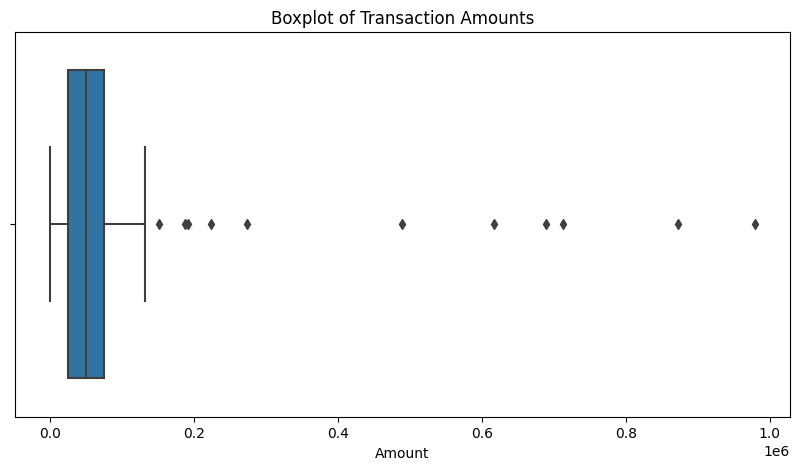

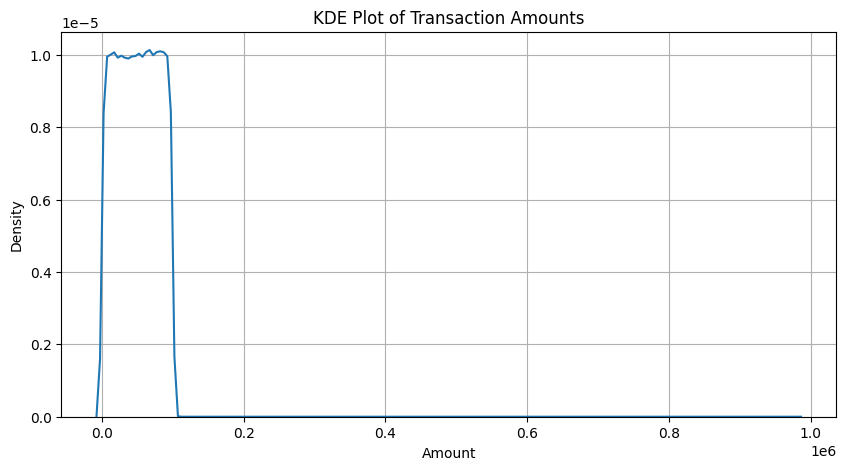

The details for the minimum transaction are:
TransactionID : TXN1805
AccountID : ACC1
Amount : 10.51
Merchant : MerchantD
TransactionType : Purchase
Location : London

The details for the maximum transaction are:
TransactionID : TXN1049
AccountID : ACC14
Amount : 978942.26
Merchant : MerchantJ
TransactionType : Transfer
Location : New York


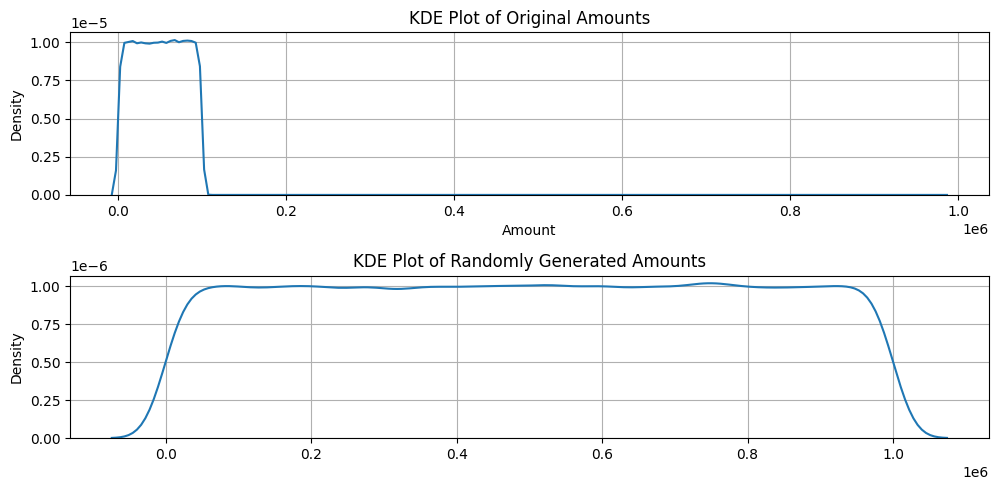

Lower Limit: -49967.58374999998, Upper Limit: 150109.28624999998
trigger
NOT EXCEEDING    216949
EXCEEDING            11
Name: count, dtype: int64


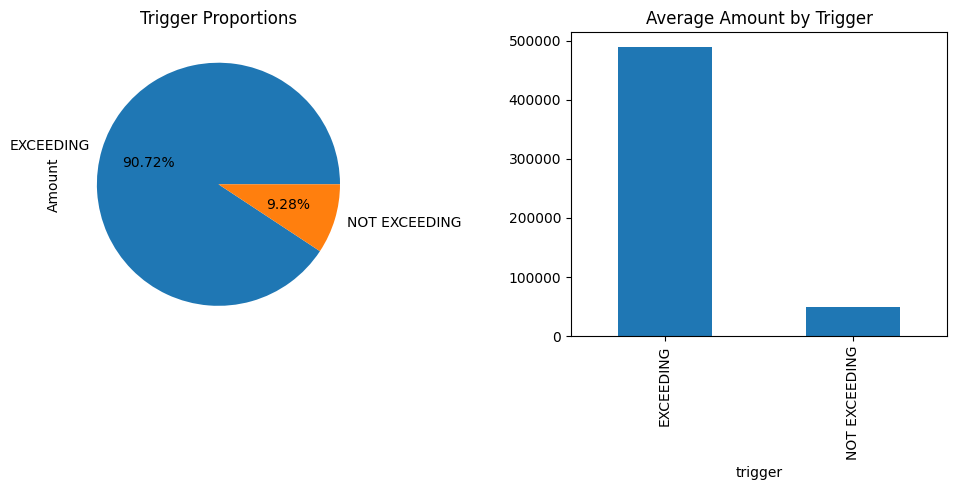

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Suppress warnings and set plot style
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [10, 5]

# Load data
df = pd.read_csv('/kaggle/input/anomaly-dataset/financial_anomaly_data.csv')

# Display data summary
print(df.head())
print(df.shape)
print(df.info())
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()
print("Shape after dropping NaN rows:", df.shape)

# Display unique values and column names
print(df.columns)
print(df.nunique())

# Convert 'Timestamp' column to datetime
def time_format(x):
    return datetime.strptime(x, "%d-%m-%Y %H:%M")

df['Timestamp'] = df['Timestamp'].apply(time_format)
df = df.set_index('Timestamp')

# Plot 'Amount' over time
df['Amount'].plot()
plt.title('Transaction Amount Over Time')
plt.grid()
plt.show()

# Unique Transaction IDs and Account IDs
print("Unique Transaction IDs:", df['TransactionID'].nunique())
print("Unique Account IDs:", df['AccountID'].nunique())

# Total transactions and average transaction amounts by AccountID
for i, j in zip(df.groupby(['AccountID'])['TransactionID'].count().index, 
                df.groupby(['AccountID'])['TransactionID'].count().values):
    print(f"The total transactions for account {i} is {j}")

for i, j in zip(df.groupby(['AccountID'])['Amount'].mean().index, 
                df.groupby(['AccountID'])['Amount'].mean().values):
    print(f"The average transaction amount for account {i} is {j}")

# Maximum and minimum transaction amounts
print("Maximum transaction amount:", df['Amount'].max())
print("Minimum transaction amount:", df['Amount'].min())

# Visualize 'Amount' distribution
sns.boxplot(x=df['Amount'])
plt.title('Boxplot of Transaction Amounts')
plt.show()

sns.kdeplot(x=df['Amount'])
plt.title('KDE Plot of Transaction Amounts')
plt.grid()
plt.show()

# Details of minimum and maximum transactions
print("The details for the minimum transaction are:")
min_trans = df[df['Amount'] == df['Amount'].min()]
for i, j in zip(df.columns, min_trans.values[0]):
    print(f"{i} : {j}")

print("\nThe details for the maximum transaction are:")
max_trans = df[df['Amount'] == df['Amount'].max()]
for i, j in zip(df.columns, max_trans.values[0]):
    print(f"{i} : {j}")

# Generate random data for comparison
amt = pd.Series(np.random.randint(0, 1000000, size=df.shape[0]))

plt.subplot(2, 1, 1)
sns.kdeplot(df['Amount'])
plt.title('KDE Plot of Original Amounts')
plt.grid()

plt.subplot(2, 1, 2)
sns.kdeplot(amt)
plt.title('KDE Plot of Randomly Generated Amounts')
plt.grid()

plt.tight_layout()
plt.show()

# IQR Calculation for Outlier Detection
q1 = df['Amount'].quantile(0.25)
q3 = df['Amount'].quantile(0.75)
iqr = q3 - q1
ll = q1 - (1.5 * iqr)  # Lower limit
ul = q3 + (1.5 * iqr)  # Upper limit

print(f"Lower Limit: {ll}, Upper Limit: {ul}")

# Create a trigger list based on outlier thresholds
trigger_list = ["EXCEEDING" if i > ul else "NOT EXCEEDING" for i in df['Amount']]
trigger_df = pd.DataFrame({'Amount': df['Amount'], 'trigger': trigger_list})

# Trigger counts
print(trigger_df['trigger'].value_counts())

# Visualization of triggers
plt.subplot(1, 2, 1)
trigger_df.groupby('trigger')['Amount'].mean().plot(kind='pie', autopct='%0.2f%%', title='Trigger Proportions')
plt.subplot(1, 2, 2)
trigger_df.groupby('trigger')['Amount'].mean().plot(kind='bar', title='Average Amount by Trigger')

plt.tight_layout()
plt.show()


First few rows after scaling:
             Timestamp TransactionID AccountID    Amount   Merchant  \
0 2023-01-01 08:00:00       TXN1127      ACC4  95071.92  MerchantH   
1 2023-01-01 08:01:00       TXN1639     ACC10  15607.89  MerchantH   
2 2023-01-01 08:02:00        TXN872      ACC8  65092.34  MerchantE   
3 2023-01-01 08:03:00       TXN1438      ACC6     87.87  MerchantE   
4 2023-01-01 08:04:00       TXN1338      ACC6    716.56  MerchantI   

  TransactionType     Location  Amount_scaled  
0        Purchase        Tokyo       0.097107  
1        Purchase       London       0.015933  
2      Withdrawal       London       0.066482  
3        Purchase       London       0.000079  
4        Purchase  Los Angeles       0.000721  
'Amount_scaled' column created successfully.


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 15, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 15, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 15, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 15)                  │             495 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 129,935 (507.56 KB)

 Trainable params: 129,935 (507.56 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - loss: 8.3609e-04 - val_loss: 6.0932e-04 - learning_rate: 0.0010
Epoch 2/50
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - loss: 5.9415e-04 - val_loss: 4.8035e-04 - learning_rate: 0.0010
Epoch 3/50
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - loss: 4.8185e-04 - val_loss: 4.1993e-04 - learning_rate: 0.0010
Epoch 4/50
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - loss: 4.2117e-04 - val_loss: 3.6299e-04 - learning_rate: 0.0010
Epoch 5/50
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - loss: 3.7550e-04 - val_loss: 3.0309e-04 - learning_rate: 0.0010
Epoch 6/50
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - loss: 3.3188e-04 - val_loss: 2.5517e-04 - learning_rate: 0.0010
Epoch 7/50
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - loss: 2.7761e-04 - val_loss: 1.9274e-04 - learning_rate: 0.0010
Epoch 8/50
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - loss: 2.2726e-04 - val_loss: 1.8628e-04 - learning_rate: 0.0010
Epoch 9/50
2712/2712 ━━━━━━━━━━

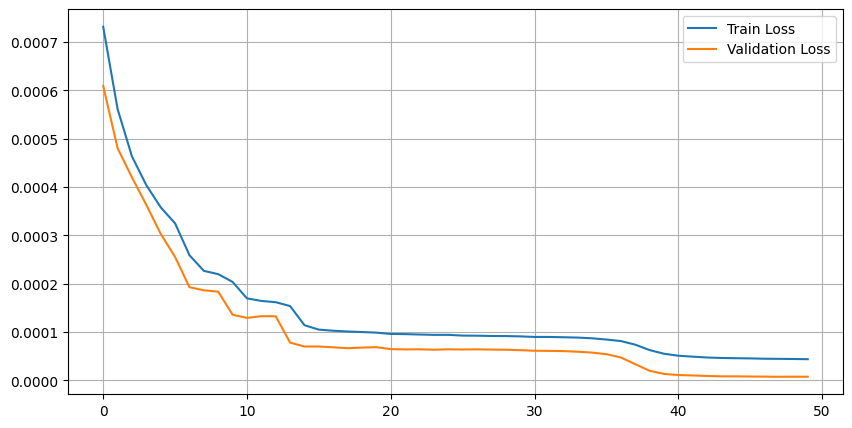

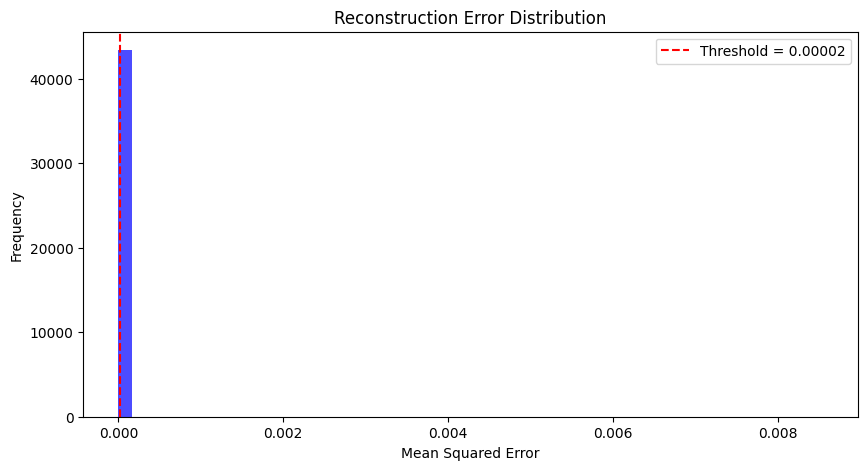

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Suppress warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [10, 5]

# Load the dataset
df = pd.read_csv('/kaggle/input/anomaly-dataset/financial_anomaly_data.csv')

# Drop NaN values
df = df.dropna()

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%d-%m-%Y %H:%M")

# Normalize the Amount column
scaler = MinMaxScaler()

# Ensure we are scaling the 'Amount' column only and creating a new 'Amount_scaled' column
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])

# Check the first few rows after scaling
print("First few rows after scaling:\n", df.head())

# Ensure that 'Amount_scaled' column is properly created
if 'Amount_scaled' not in df.columns:
    raise KeyError("'Amount_scaled' column was not created successfully.")
else:
    print("'Amount_scaled' column created successfully.")

# Create sequences for LSTM
sequence_length = 15  # Adjusted sequence length for better learning

def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        sequences.append(seq)
    return np.array(sequences)

# Prepare data for LSTM using 'Amount_scaled'
data_sequences = create_sequences(df['Amount_scaled'].values, sequence_length)

# Split into training and testing sets
X_train, X_test = train_test_split(data_sequences, test_size=0.2, random_state=42)

# Reshape for LSTM input (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], sequence_length, 1))
X_test = X_test.reshape((X_test.shape[0], sequence_length, 1))

# Build the LSTM Autoencoder model
model = Sequential([
    LSTM(128, activation='relu', input_shape=(sequence_length, 1), return_sequences=True),
    Dropout(0.3),
    LSTM(64, activation='relu', return_sequences=True),
    Dropout(0.3),
    LSTM(32, activation='relu', return_sequences=False),
    Dense(32, activation='relu'),
    Dense(sequence_length, activation='linear')
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Callbacks for training
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
]

# Train the model and get history
history = model.fit(
    X_train, X_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, X_test),
    callbacks=callbacks,
    verbose=1
)

# Calculate accuracy based on reconstruction error (Threshold-based anomaly detection)
def calculate_accuracy(model, X_test, threshold=None):
    reconstructed = model.predict(X_test)
    reconstructed = reconstructed.reshape((reconstructed.shape[0], reconstructed.shape[1], 1))
    mse = np.mean(np.square(X_test - reconstructed), axis=(1, 2))
    
    # Automatically determine the threshold if not provided
    if threshold is None:
        threshold = np.percentile(mse, 95)  # Use the 95th percentile as the threshold
    
    accuracy = np.sum(mse < threshold) / len(mse)
    return accuracy, mse, threshold

# Get accuracy and mse
accuracy, mse, threshold = calculate_accuracy(model, X_test)
print(f"Accuracy: {accuracy * 100:.2f}% (Threshold = {threshold:.5f})")

# Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Plot reconstruction error distribution
plt.hist(mse, bins=50, color='blue', alpha=0.7)
plt.axvline(threshold, color='red', linestyle='dashed', label=f'Threshold = {threshold:.5f}')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()


1356/1356 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Accuracy based on reconstruction error (threshold=0.01): 100.00%


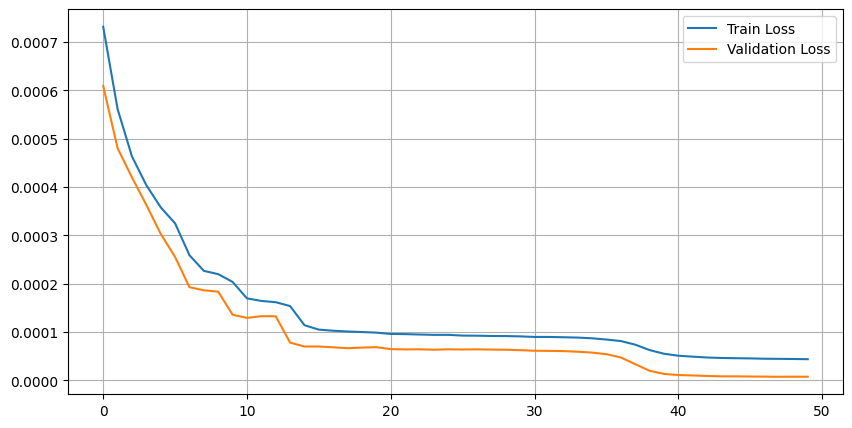

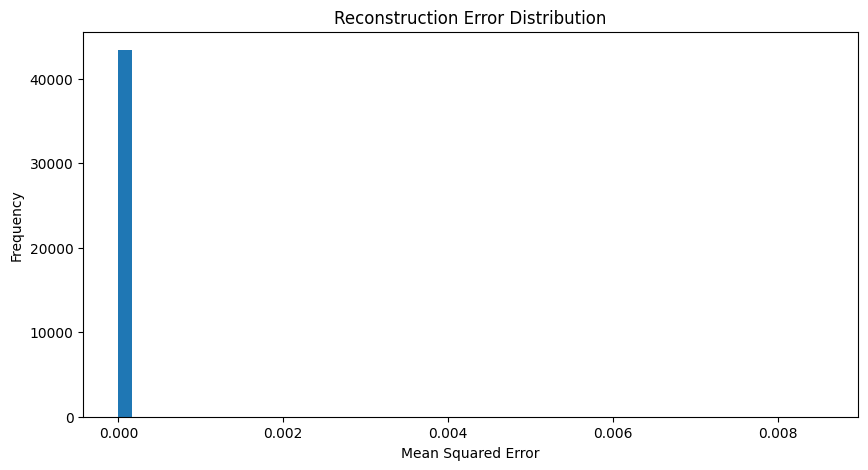

In [27]:

# Calculate accuracy based on reconstruction error (Threshold-based anomaly detection)
def calculate_accuracy(model, X_test, threshold=0.01):
    # Get reconstruction error
    reconstructed = model.predict(X_test)
    reconstructed = reconstructed.reshape((reconstructed.shape[0], reconstructed.shape[1], 1))  # Add feature dimension
    mse = np.mean(np.square(X_test - reconstructed), axis=(1, 2))  # MSE per sample
    accuracy = np.sum(mse < threshold) / len(mse)  # Accuracy: how many errors are below threshold
    return accuracy, mse


# Get accuracy and mse
accuracy, mse = calculate_accuracy(model, X_test, threshold=0.01)

# Print overall accuracy
print(f"Accuracy based on reconstruction error (threshold=0.01): {accuracy * 100:.2f}%")

# Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Optional: Plot reconstruction error distribution (optional)
plt.hist(mse, bins=50)
plt.title('Reconstruction Error Distribution')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.show()


1356/1356 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Threshold: 0.01, Accuracy: 100.00%
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Threshold: 0.005, Accuracy: 100.00%
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Threshold: 0.001, Accuracy: 99.98%
1356/1356 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Threshold: 0.0005, Accuracy: 99.98%


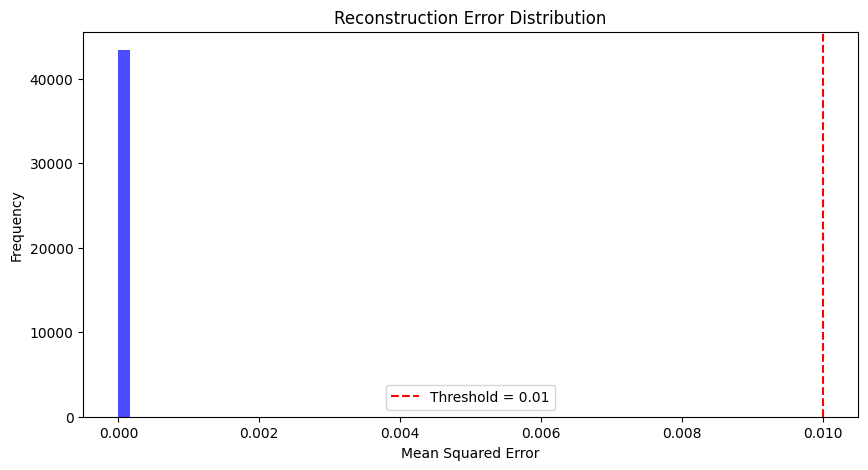

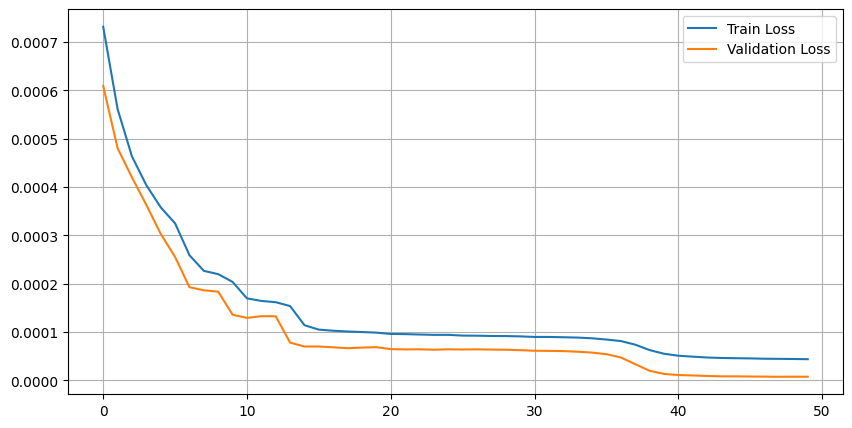

In [28]:
for threshold in [0.01, 0.005, 0.001, 0.0005]:
    accuracy, _ = calculate_accuracy(model, X_test, threshold=threshold)
    print(f"Threshold: {threshold}, Accuracy: {accuracy * 100:.2f}%")
plt.hist(mse, bins=50, color='blue', alpha=0.7)
plt.title('Reconstruction Error Distribution')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.axvline(0.01, color='red', linestyle='dashed', label='Threshold = 0.01')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.grid()
plt.show()


6780/6780 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step
Threshold for fraud detection: 0.00321

Fraudulent Transaction IDs (First 10):
['TXN65', 'TXN648', 'TXN419', 'TXN41', 'TXN1072', 'TXN1497', 'TXN1411', 'TXN1760', 'TXN1634', 'TXN247']

Non-Fraudulent Transaction IDs (First 10):
['TXN684', 'TXN613', 'TXN503', 'TXN1578', 'TXN1021', 'TXN1679', 'TXN1110', 'TXN1052', 'TXN1982', 'TXN649']

Total Fraudulent Transactions: 10848
Total Non-Fraudulent Transactions: 206097


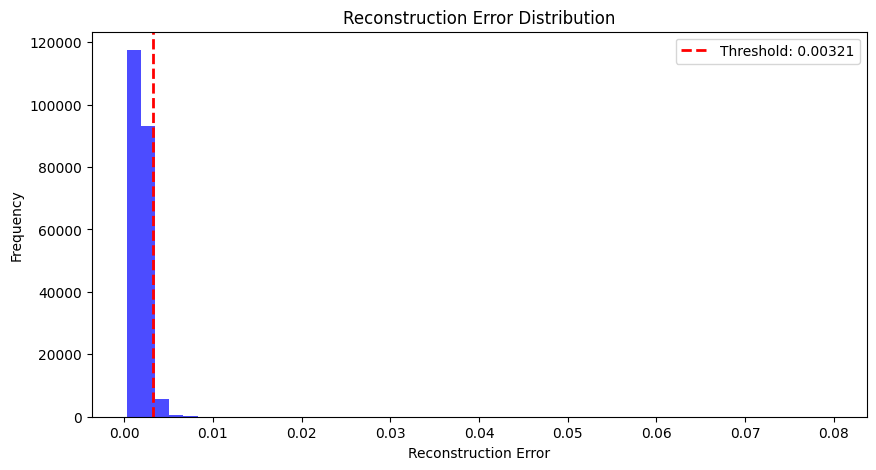

In [30]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Ensure the sequence length is consistent with the model training
sequence_length = 15

# Normalize the Amount column if not already done
if 'Amount_scaled' not in df.columns:
    scaler = MinMaxScaler()
    df['Amount_scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        sequences.append(seq)
    return np.array(sequences)

# Prepare data sequences
all_data_sequences = create_sequences(df['Amount_scaled'].values, sequence_length)
all_data_sequences_reshaped = all_data_sequences.reshape((all_data_sequences.shape[0], sequence_length, 1))

# Predict using the model
all_data_pred = model.predict(all_data_sequences_reshaped)

# Flatten the third dimension of `all_data_sequences_reshaped`
all_data_sequences_flat = all_data_sequences_reshaped.squeeze(axis=-1)  # Shape becomes (number of samples, sequence_length)

# Calculate Mean Absolute Error (MAE) loss
all_data_mae_loss = np.mean(np.abs(all_data_pred - all_data_sequences_flat), axis=1)

# Determine threshold for fraud detection
threshold = np.percentile(all_data_mae_loss, 95)  # Use the 95th percentile as the threshold
print(f"Threshold for fraud detection: {threshold:.5f}")

# Set fraud or non-fraud status
fraud_status = ["FRAUD" if error > threshold else "NON-FRAUD" for error in all_data_mae_loss]

# Create a DataFrame for analysis
analysis_df = pd.DataFrame({
    'TransactionID': df.iloc[sequence_length:]['TransactionID'].values,  # Align Transaction IDs with sequence start
    'ReconstructionError': all_data_mae_loss,
    'Status': fraud_status
})

# Extract Transaction IDs for Fraud and Non-Fraud
fraudulent_transactions = analysis_df[analysis_df['Status'] == "FRAUD"]['TransactionID'].tolist()
non_fraudulent_transactions = analysis_df[analysis_df['Status'] == "NON-FRAUD"]['TransactionID'].tolist()

# Print only the first 10 Fraudulent Transaction IDs
print("\nFraudulent Transaction IDs (First 10):")
print(fraudulent_transactions[:10])  # Slicing to get the first 10 items

# Print only the first 10 Non-Fraudulent Transaction IDs
print("\nNon-Fraudulent Transaction IDs (First 10):")
print(non_fraudulent_transactions[:10])  # Slicing to get the first 10 items

# Optional: Count of Fraudulent and Non-Fraudulent Transactions
print(f"\nTotal Fraudulent Transactions: {len(fraudulent_transactions)}")
print(f"Total Non-Fraudulent Transactions: {len(non_fraudulent_transactions)}")

# Optional: Plot Reconstruction Error Distribution
import matplotlib.pyplot as plt

plt.hist(all_data_mae_loss, bins=50, color='blue', alpha=0.7)
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label=f'Threshold: {threshold:.5f}')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [5]:
# Import necessary libraries
import pandas as pd
import plotly.express as px
import plotly.io as pio
from IPython.display import display, FileLink

# Set Plotly renderer for Kaggle
pio.renderers.default = 'iframe'  # Alternative renderers: 'notebook', 'colab', 'jupyterlab'

# Assume 'analysis_df' is already created from previous steps
# If not, ensure 'analysis_df' is defined with required columns: TransactionID, ReconstructionError, Status

# Add a TransactionIndex column for x-axis
analysis_df['TransactionIndex'] = range(1, len(analysis_df) + 1)

# Plot the graph using Plotly Express
fig = px.scatter(
    analysis_df,
    x='TransactionIndex',  # X-axis: Sequential index
    y='ReconstructionError',  # Y-axis: Reconstruction error
    color='Status',  # Color based on Fraud/Non-Fraud
    hover_data={
        'TransactionID': True,  # Show Transaction ID on hover
        'ReconstructionError': ':.4f',  # Format Reconstruction Error to 4 decimal places
        'Status': True  # Show Fraud/Non-Fraud Status
    },
    title="Transaction Fraud Detection",  # Title of the plot
    labels={
        'TransactionIndex': 'Transaction Number',  # X-axis label
        'ReconstructionError': 'Reconstruction Error'  # Y-axis label
    },
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Transaction Number",
    yaxis_title="Reconstruction Error",
    legend_title="Fraud Status",
    hoverlabel=dict(
        bgcolor="white",  # Background color for hover label
        font_size=12,  # Font size
        font_family="Arial"  # Font family
    )
)

# Display the figure in Kaggle
fig.show()

# Save the plot as an HTML file for download (if needed)
fig.write_html("transaction_fraud_plot.html")

# Provide a download link for the HTML file
print("Download the plot as an HTML file:")
display(FileLink("transaction_fraud_plot.html"))


Download the plot as an HTML file:


/kaggle/working/transaction_fraud_plot.html

In [32]:
def check_transaction_status(transaction_id):
    """
    Function to check the status of a given Transaction ID.
    
    Args:
        transaction_id (str): The Transaction ID to check.
    
    Returns:
        str: The status of the Transaction ID ("FRAUD" or "NON-FRAUD").
    """
    if transaction_id in analysis_df['TransactionID'].values:
        status = analysis_df.loc[analysis_df['TransactionID'] == transaction_id, 'Status'].values[0]
        return f"Transaction ID {transaction_id} is classified as {status}."
    else:
        return f"Transaction ID {transaction_id} not found in the dataset."

# Take user input for Transaction ID
transaction_id_to_check = input("Enter the Transaction ID to check its status: ")

# Call the function and display the result
result = check_transaction_status(transaction_id_to_check)
print(result)


Enter the Transaction ID to check its status:  TXN684


Transaction ID TXN684 is classified as NON-FRAUD.


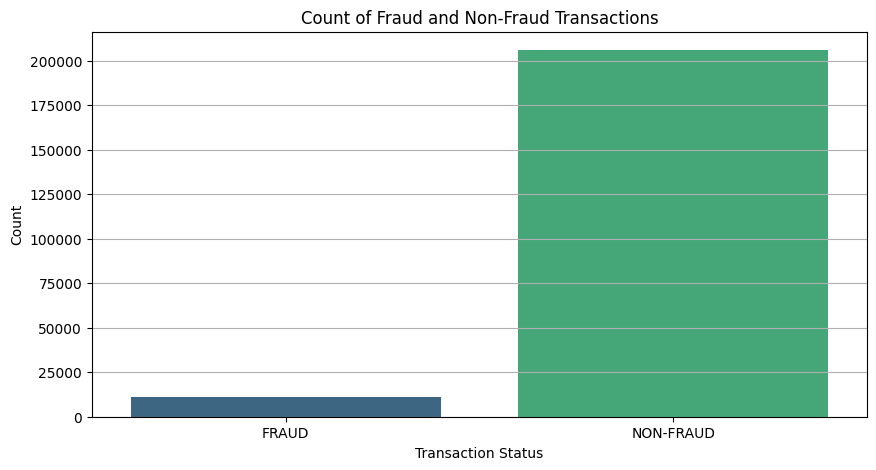

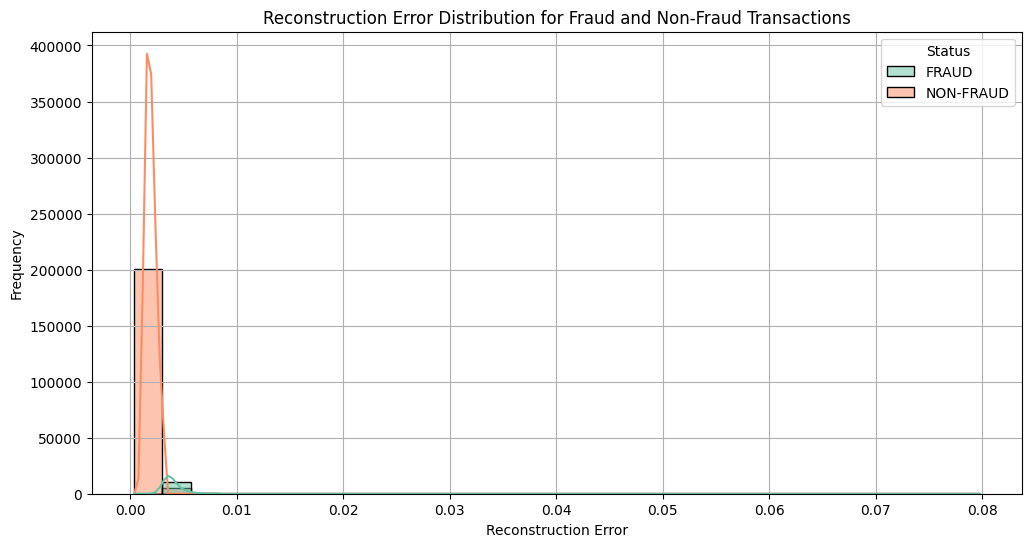

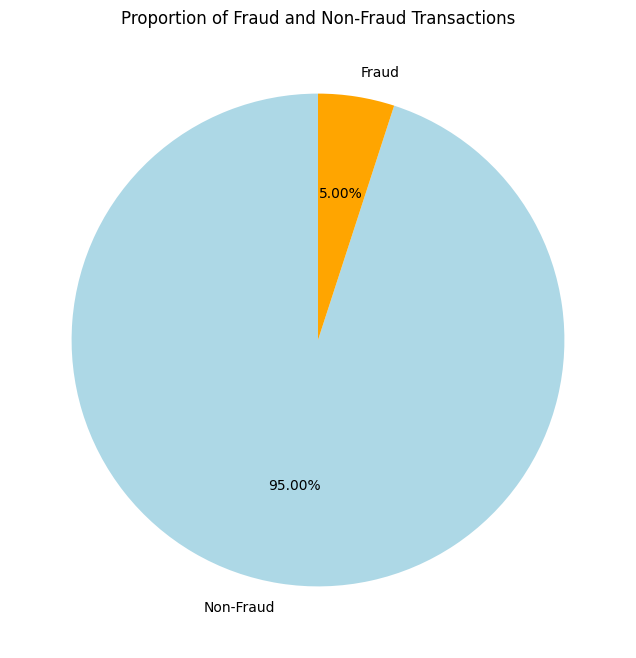

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for Fraud and Non-Fraud transactions
plt.figure(figsize=(10, 5))
sns.countplot(x='Status', data=analysis_df, palette='viridis')
plt.title('Count of Fraud and Non-Fraud Transactions')
plt.xlabel('Transaction Status')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# Distribution of Reconstruction Errors for Fraud and Non-Fraud
plt.figure(figsize=(12, 6))
sns.histplot(data=analysis_df, x='ReconstructionError', hue='Status', kde=True, palette='Set2', bins=30)
plt.title('Reconstruction Error Distribution for Fraud and Non-Fraud Transactions')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Optional: Pie chart for proportion of Fraud and Non-Fraud
fraud_counts = analysis_df['Status'].value_counts()

plt.figure(figsize=(8, 8))
fraud_counts.plot(kind='pie', autopct='%0.2f%%', labels=['Non-Fraud', 'Fraud'], colors=['lightblue', 'orange'], startangle=90)
plt.title('Proportion of Fraud and Non-Fraud Transactions')
plt.ylabel('')  # Remove the default ylabel
plt.show()


In [35]:
# Save the model to a directory
model.save('Fraud_detection_model_.h5')  # Save as a .h5 file
